<a href="https://colab.research.google.com/github/simoneminorr/eda_assignment/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds3001f25/eda_assignment.git`
### Do Q1, Q2, and Q3.

In [1]:
! git clone https://github.com/ds3001f25/eda_assignment.git

Cloning into 'eda_assignment'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 6 (from 1)
Receiving objects: 100% (9/9), 799.41 KiB | 4.02 MiB/s, done.


**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

1. Show that  𝑚(𝑎+𝑏𝑋)=𝑎+𝑏×𝑚(𝑋)

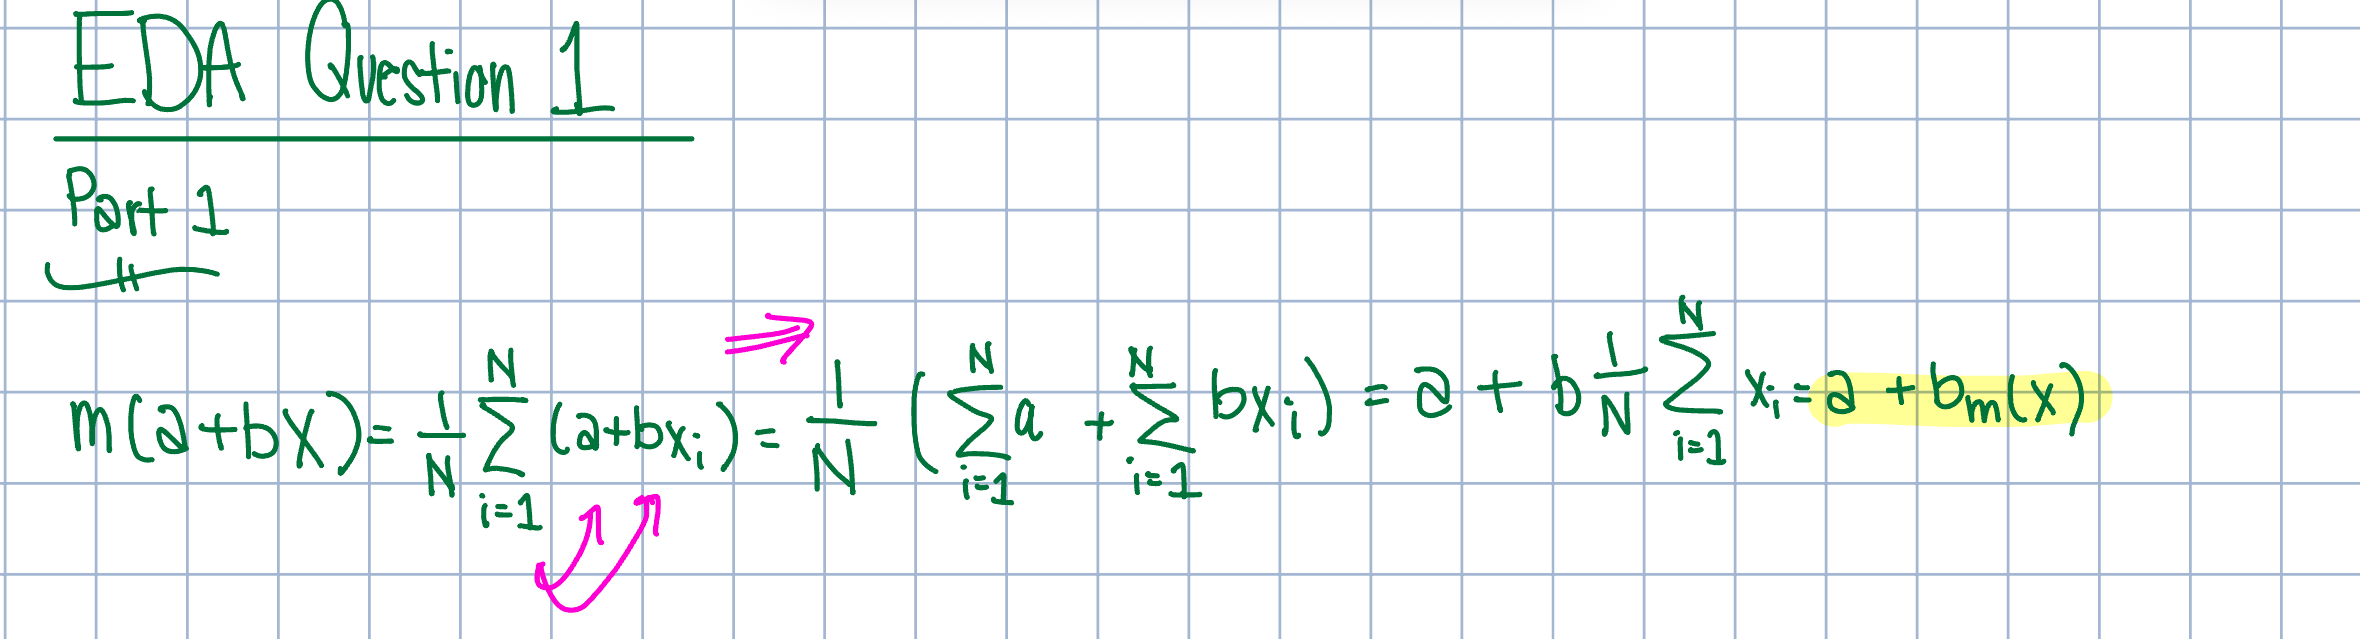

In [ ]:
2. Show that  cov(𝑋,𝑎+𝑏𝑌)=𝑏×cov(𝑋,𝑌)

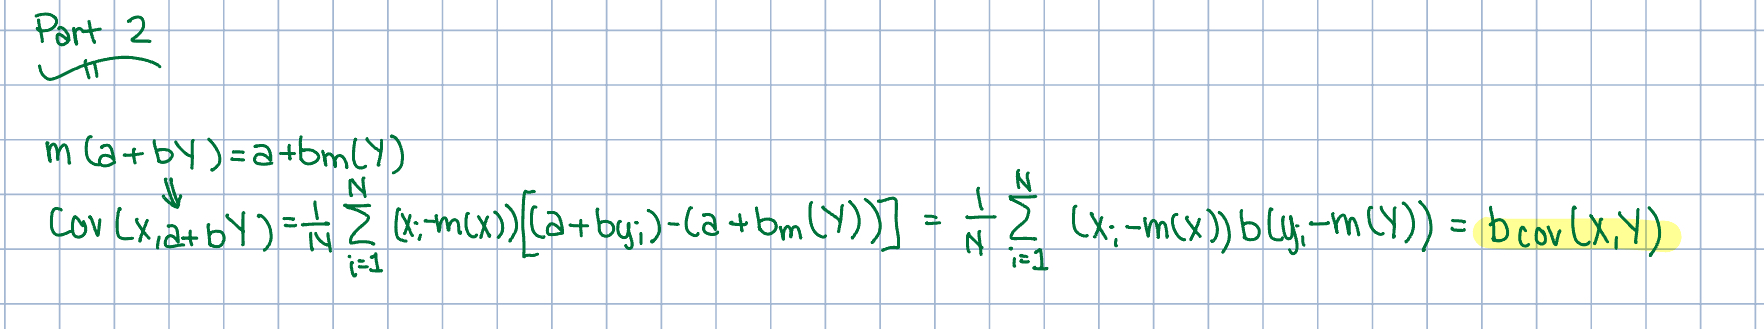

3. Show that  cov(𝑎+𝑏𝑋,𝑎+𝑏𝑋)=𝑏2cov(𝑋,𝑋) , and in particular that  cov(𝑋,𝑋)=𝑠2 .

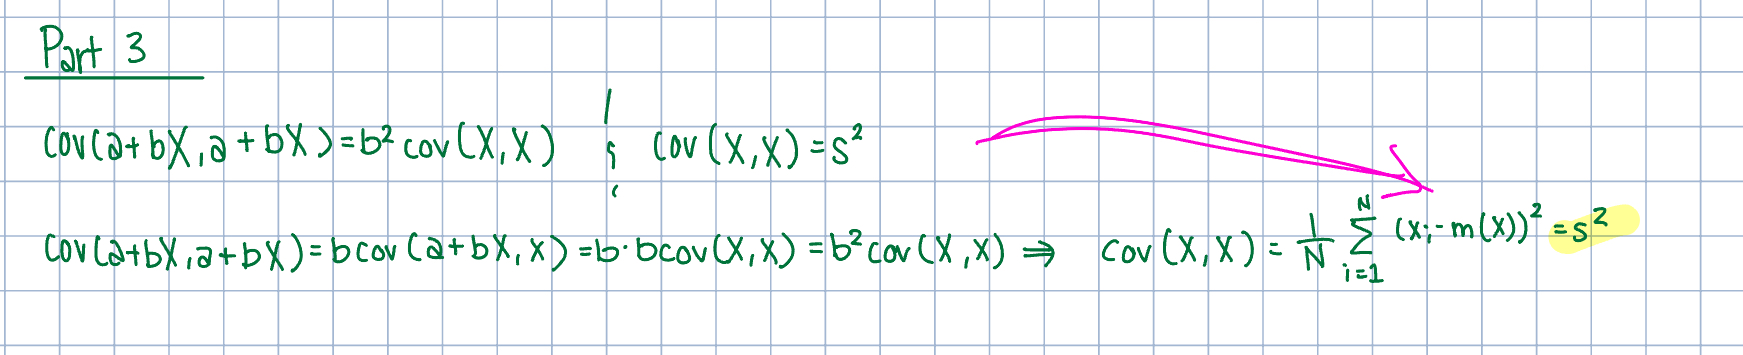

4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if  𝑥≥𝑥′ , then  𝑔(𝑥)≥𝑔(𝑥′) ), like  2+5×𝑋  or  arcsinh(𝑋) . Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?

1. median is going to be similar for any quartile because it is the middle value
2. 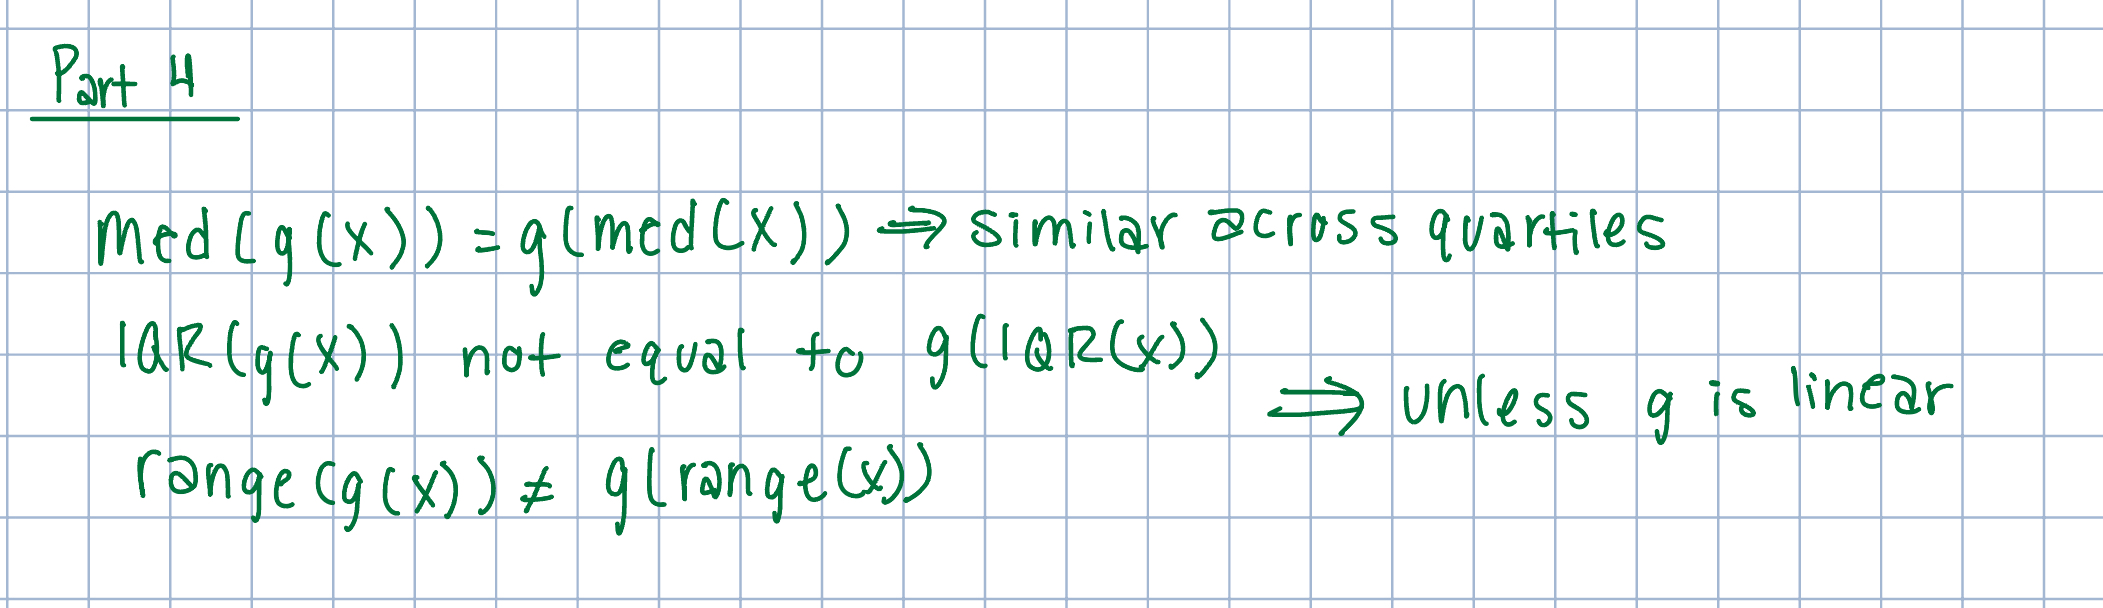IQR and range are not always going to be equal unless g is linear

5. Consider a non-decreasing transformation  𝑔() . Is is always true that  𝑚(𝑔(𝑋))=𝑔(𝑚(𝑋)) ?

Not always true, but true if/when the g in the equation is linear

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

In [2]:
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cd eda_assignment/

/content/eda_assignment


1. Load the ./data/airbnb_hw.csv data with Pandas. This provides a dataset of AirBnB rental properties for New York City.

In [4]:
airbnb= read_csv('data/airbnb_hw.csv')

2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.

In [5]:
airbnb.head()
print(airbnb.head())
airbnb.shape
airbnb.count()
#.shape returns rows, columns
#There are 30478 rows and 13 columns
#There are 30478 observations
#Variables: Host Id, Since, Name Neighbourhood, Property Type, Review Scores Rating (bin), Room Type, Zipcode, Beds, Number of Records, Number od Reviews, Price, and Review Scores Rating

    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartment                         NaN     Private room  10032.0   1.0   
3     Apartment                         NaN  Entire home/apt  10024.0   3.0   
4     Apartment                        95.0     Private room  10036.0   3.0   

   Number of Records  Number Of Reviews Price  Review Scores R

,0
Host Id,30478
Host Since,30475
Name,30478
Neighbourhood,30478
Property Type,30475
Review Scores Rating (bin),22155
Room Type,30478
Zipcode,30344
Beds,30393
Number of Records,30478


3. Cross tabulate Room Type and Property Type. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?

In [6]:
pd.crosstab(airbnb['Room Type'], airbnb['Property Type'])
#Most rental properties are apartments, then houses, then lofts and it seems these are where people more often than not are able to rent the entire property or a private room
#Most apartment property types have an entire property/apt. or second most a private room and lastly, a shared room as the room type
#Private rooms are more common than renting the entire property for bed and breakfasts, houses, and dorms

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


4. For Price, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use log to transform price into a new variable, price_log, and take these steps again.

AttributeError: 'XAxis' object has no attribute 'tick_params'

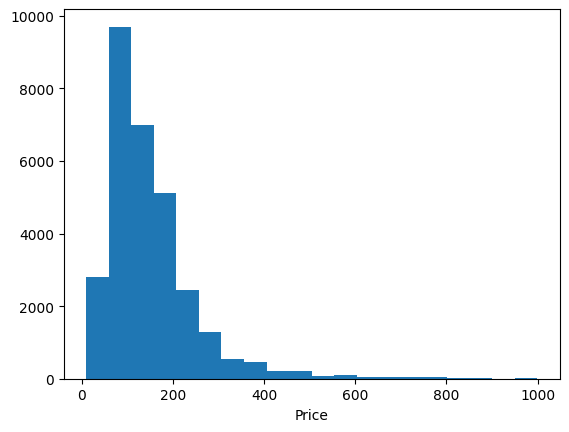

In [31]:
#histogram
airbnb['Price'].hist(bins=20, grid=False)
plt.xlabel('Price')
plt.gca().xaxis.tick_params(labelsize=10) # Corrected line
plt.ylabel('Frequency')
plt.show()

#needed to correct lines because before it was overcrowded and you could not see the tick marks
#Source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html

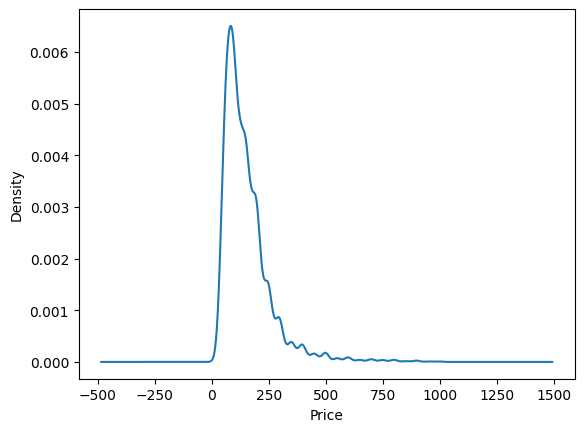

In [12]:
#kernel density for initial data
var='Price'
airbnb[var].plot.kde()
plt.xlabel('Price')
plt.show()

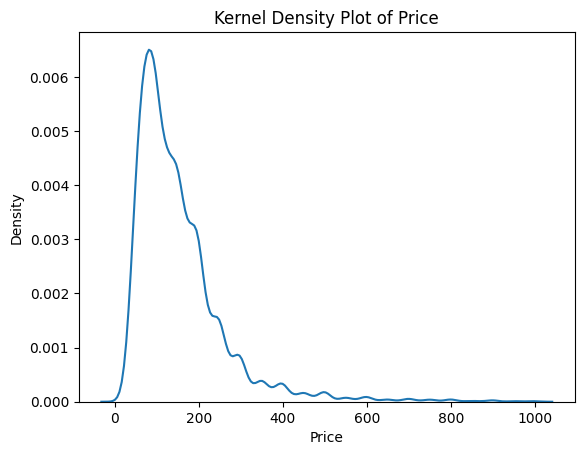

In [9]:
# kernel density
# Convert 'Price' to numeric, coercing errors to NaN
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors='coerce')

sns.kdeplot(airbnb['Price'].dropna())
plt.title('Kernel Density Plot of Price (Cleaned)')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

# The upside will be that it's easy to visualize many series at once, grouped by a categorical variable, and the choice of "bins" isn't as arbitrary (there are a lot of good ways to pick the bandwidth)
# The downside is that if the data have big spikes, the kernel density plot struggles to represent that faithfully, because it is trying to smooth everything out.

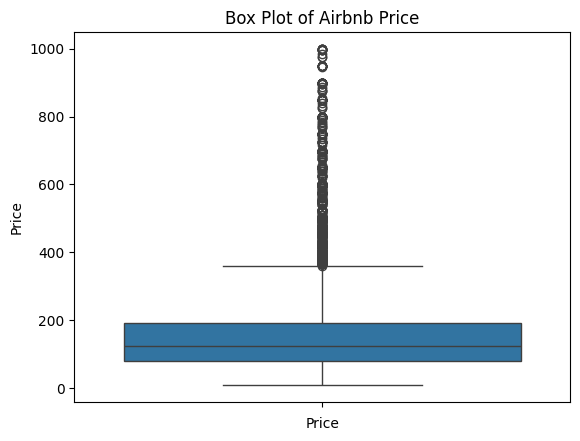

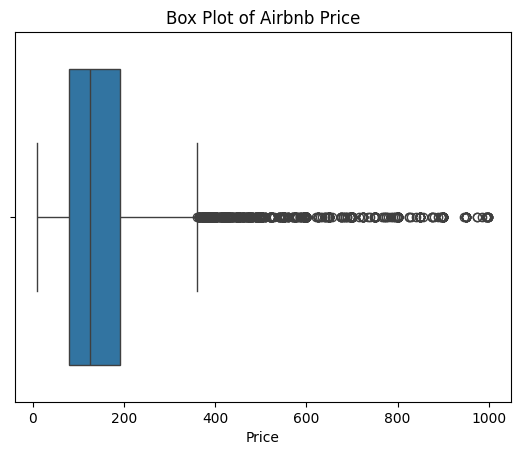

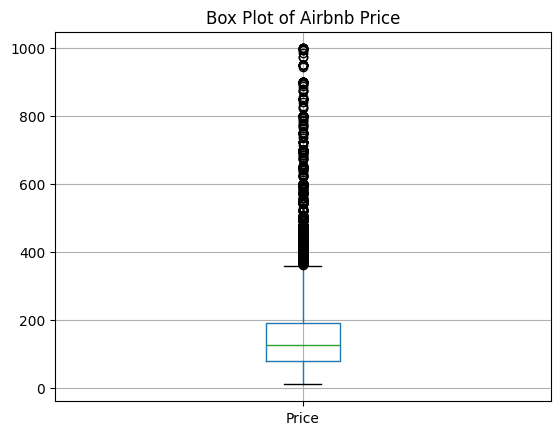

In [14]:
#boxplot
sns.boxplot(airbnb['Price'])
plt.title('Box Plot of Airbnb Price')
plt.xlabel('Price')
plt.show()

#OR Horizontal

sns.boxplot(data=airbnb, x=var)
plt.title('Box Plot of Airbnb Price')
plt.show()

#OR

airbnb.boxplot(column=var)
plt.title('Box Plot of Airbnb Price')
plt.show()

In [15]:
#statistical description of airbnb data
airbnb['Price'].describe()

,Price
count,30297.000000
mean,153.357032
std,108.895698
min,10.000000
25%,80.000000
50%,125.000000
75%,192.000000
max,999.000000


In [16]:
#statistical description: slight right skew which means there is a slight tail on the right cause by more extreme high prices. This makes the mean/average of the prices higher than the median yet most prices are still within the $0-$400 range
#Are the data badly scaled? Are there many outliers?: The box plot shows that there are many outliers and there is a long tail for the plots which indicates that there is bad scaling and challenging to make valid comparisons based on the visual and various magnitudes

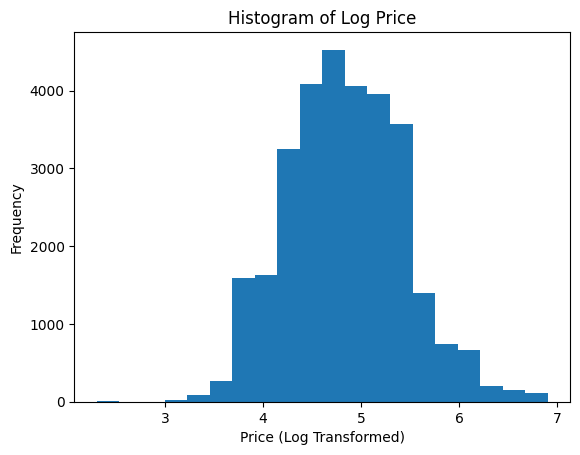

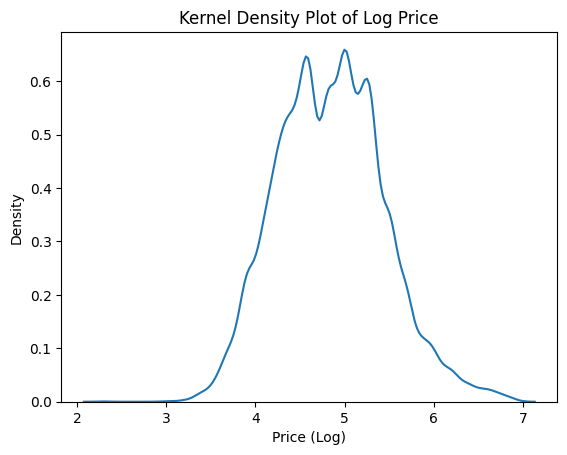

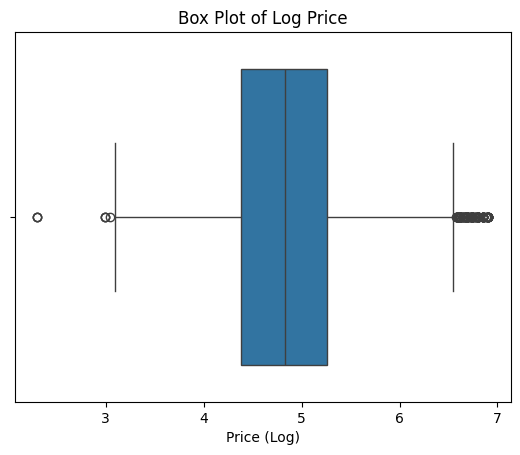

,price_log
count,30297.000000
mean,4.845370
std,0.596999
min,2.302585
25%,4.382027
50%,4.828314
75%,5.257495
max,6.906755


In [18]:
# Use log to transform price into a new variable, price_log, and take these steps again.
airbnb['price_log'] = np.log(airbnb['Price'])

# histogram of price_log for values > 0
airbnb['price_log'][airbnb['price_log'] > 0].hist(bins=20, grid=False)
plt.xlabel('Price (Log Transformed)')
plt.ylabel('Frequency')
plt.title('Histogram of Log Price')
plt.show()

# Kernel density plot of price_log
sns.kdeplot(airbnb['price_log'].dropna()) # Drop NaN values for kdeplot
plt.xlabel('Price (Log)')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Log Price')
plt.show()

# Box plot of price_log
sns.boxplot(x=airbnb['price_log'].dropna()) # Drop NaN values for boxplot
plt.xlabel('Price (Log)')
plt.title('Box Plot of Log Price')
plt.show()

# Statistical description of price_log
display(airbnb['price_log'].describe())

In [19]:
#statistical description of log price airbnb data
airbnb['price_log'].describe()

,price_log
count,30297.000000
mean,4.845370
std,0.596999
min,2.302585
25%,4.382027
50%,4.828314
75%,5.257495
max,6.906755


5. Make a scatterplot of price_log and Beds. Describe what you see. Use .groupby() to compute a desciption of Price conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.

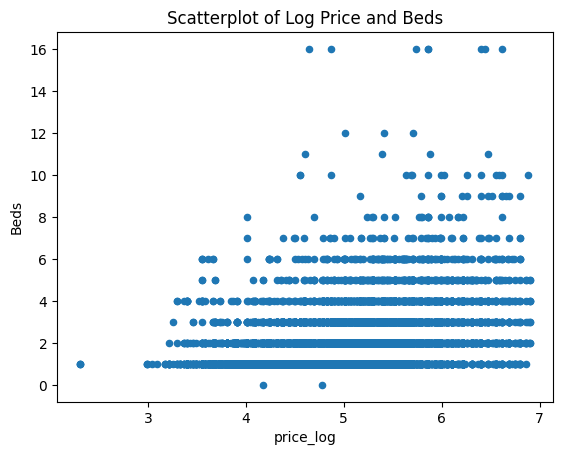

In [21]:
airbnb.plot.scatter(x='price_log', y='Beds')
plt.title('Scatterplot of Log Price and Beds')
plt.xlabel('price_log')
plt.ylabel('Beds')
plt.show()

In [32]:
airbnb.groupby('Beds')['Price'].describe()
#average price is higher at 9 beds but otherwise is pretty similar across bed counts probably because it is proportional to the number of people staying in airbnb per bed
#std. dev. is lower for 1 bed and 12 beds
#std. dev is generally higher with the more beds present in the airbnb which signifies that the prices range as the bed count goes up probably because the types of properties vary in regard to what you are paying for

,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,92.000000,38.183766,65.0,78.50,92.0,105.50,119.0
1.0,20307.0,124.757670,75.685752,10.0,75.00,100.0,155.00,950.0
2.0,6561.0,186.702332,115.044205,25.0,115.00,160.0,225.00,999.0
3.0,2029.0,234.928043,142.288189,26.0,140.00,200.0,299.00,999.0
4.0,766.0,280.554830,175.512312,27.0,150.00,240.0,363.75,999.0
5.0,274.0,322.000000,190.319415,35.0,186.00,285.0,425.00,995.0
6.0,166.0,316.313253,201.157585,35.0,183.75,271.0,399.00,900.0
7.0,45.0,341.377778,220.116631,55.0,177.00,300.0,445.00,900.0
8.0,20.0,331.850000,155.652202,55.0,218.75,339.5,408.75,750.0


In [22]:
airbnb.groupby('Beds')['price_log'].describe()
#average price is lower with one bed but pretty average once you increase the bed count which I assume is because it is proportional to the number of people staying at the airbnb
#standard deviation is higher with more beds which may mean there is more spread in the data when it comes to price when there are more beds

,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,4.476755,0.427613,4.174387,4.325571,4.476755,4.627939,4.779123
1.0,20307.0,4.682084,0.527569,2.302585,4.317488,4.605170,5.043425,6.856462
2.0,6561.0,5.077679,0.546961,3.218876,4.744932,5.075174,5.416100,6.906755
3.0,2029.0,5.297638,0.572851,3.258097,4.941642,5.298317,5.700444,6.906755
4.0,766.0,5.438240,0.666451,3.295837,5.010635,5.480639,5.896449,6.906755
5.0,274.0,5.596976,0.624868,3.555348,5.225704,5.652489,6.052089,6.902743
6.0,166.0,5.538625,0.712393,3.555348,5.212968,5.602112,5.988961,6.802395
7.0,45.0,5.617009,0.693481,4.007333,5.176150,5.703782,6.098074,6.802395
8.0,20.0,5.674340,0.579810,4.007333,5.386655,5.826995,6.012435,6.620073


6. Make a scatterplot of price_log and Beds, but color the graph by Room Type and Property Type. What patterns do you see? Compute a description of Price conditional on Room Type and Property Type. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

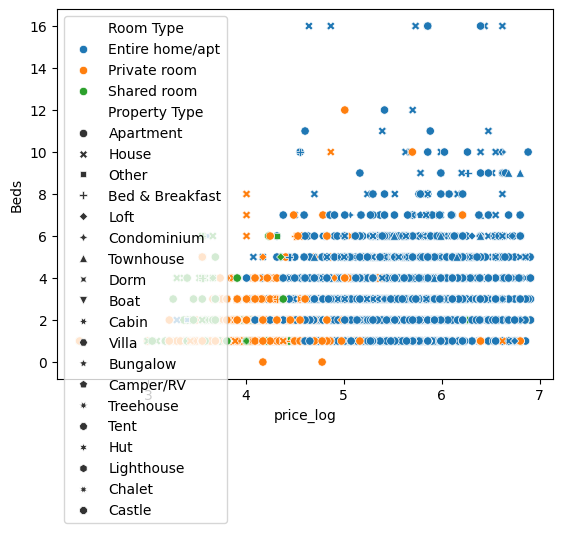

In [52]:
sns.scatterplot(data=airbnb, x='price_log', y='Beds', hue='Room Type', style='Property Type')
plt.title('Scatterplot of Log Price, Beds & Room Type')
plt.xlabel('price_log')
plt.ylabel('Beds')
plt.show()

#patterns I am seeing:
#with more beds it tends to be an entire home or apt. being rented via airbnb
#entire homes and apt. have the highest prices on average
#median seems to be the better measure of central tendency because the plot as a left skew which means there are more extreme higher price outliers which would make the mean more volatile than the median

In [33]:
airbnb.groupby(['Room Type', 'Property Type'])['Price'].describe()
#mean price of lighthouse was the cheapest property type for the entire home/apt. room type
#other types of property types and villas are the most expensive private room options
#treehouse is the most expensive on average for a shared room airbnb
#std. dev for the other property type for each room type is the largest probably due to the great variance in options

count        mean         std    min  \
Room Type       Property Type                                             
Entire home/apt Apartment        15550.0  200.210161  109.967435   10.0   
                Bed & Breakfast     13.0  184.538462  119.814172   85.0   
                Boat                 7.0  158.428571   51.110524  100.0   
                Bungalow             4.0  150.750000   46.464144   87.0   
                Cabin                1.0  250.000000         NaN  250.0   
                Camper/RV            6.0  114.333333  107.685963   45.0   
                Condominium         71.0  281.126761  175.313998   80.0   
                Dorm                 4.0   44.250000   24.060687   30.0   
                House              723.0  234.554633  159.785974   27.0   
                Lighthouse           1.0   39.000000         NaN   39.0   
                Loft               379.0  284.910290  184.515517   55.0   
                Other               10.0  290.800000  273.526273   66.0   
                Townhouse           81.0  242.037037  166.755243   66.0   
                Villa                3.0  206.333333   89.667906  120.0   
Private room    Apartment        10741.0   91.605903   46.356168   10.0   
                Bed & Breakfast    155.0   97.161290   47.031971   32.0   
                Boat                 1.0  120.000000         NaN  120.0   
                Cabin                1.0   80.000000         NaN   80.0   
                Camper/RV            1.0   39.000000         NaN   39.0   
                Castle               1.0  150.000000         NaN  150.0   
                Chalet               1.0   99.000000         NaN   99.0   
                Condominium         22.0   98.590909   40.576394   46.0   
                Dorm                16.0   86.562500   40.738137   50.0   
                House             1258.0   77.750397   49.402650   25.0   
                Hut                  2.0   75.000000   35.355339   50.0   
                Loft               310.0   99.077419   63.875489   39.0   
                Other               28.0  176.642857  141.484252   39.0   
                Tent                 4.0  126.250000   94.989034   40.0   
                Townhouse           52.0   83.365385   30.578109   45.0   
                Treehouse            1.0   95.000000         NaN   95.0   
                Villa                4.0  126.250000   71.107313   60.0   
Shared room     Apartment          684.0   77.853801   57.875888   20.0   
                Bed & Breakfast     12.0  143.666667  245.328104   30.0   
                Dorm                11.0   73.181818   46.328864   30.0   
                House               79.0   46.822785   25.152743   10.0   
                Loft                49.0   78.816327   87.521824   30.0   
                Other                4.0  148.750000  134.806961   70.0   
                Townhouse            1.0   95.000000         NaN   95.0   
                Treehouse            3.0  167.666667  114.788211   95.0   

                                    25%    50%     75%    max  
Room Type       Property Type                                  
Entire home/apt Apartment        135.00  175.0  230.00  999.0  
                Bed & Breakfast  121.00  130.0  220.00  525.0  
                Boat             122.50  150.0  182.00  250.0  
                Bungalow         133.50  160.5  177.75  195.0  
                Cabin            250.00  250.0  250.00  250.0  
                Camper/RV         49.00   74.0  114.00  325.0  
                Condominium      155.00  200.0  360.00  850.0  
                Dorm              30.00   33.5   47.75   80.0  
                House            125.00  188.0  299.00  950.0  
                Lighthouse        39.00   39.0   39.00   39.0  
                Loft             160.00  220.0  350.00  985.0  
                Other            123.75  177.5  350.00  850.0  
                Townhouse        135.00  189.0  295.00  900.0  

In [23]:
airbnb.groupby(['Room Type', 'Property Type'])['price_log'].describe()
#standard deviation tended to be higher for RVs and other property type styles of entire home/apt. room type
#std. dev. tended to be higher for other property types not listed for private room room type
#std. dev was highest for shared rooms in bed in breakfasts

count      mean       std       min  \
Room Type       Property Type                                            
Entire home/apt Apartment        15550.0  5.189336  0.449590  2.302585   
                Bed & Breakfast     13.0  5.077144  0.516313  4.442651   
                Boat                 7.0  5.022801  0.312121  4.605170   
                Bungalow             4.0  4.972587  0.355222  4.465908   
                Cabin                1.0  5.521461       NaN  5.521461   
                Camper/RV            6.0  4.458062  0.767476  3.806662   
                Condominium         71.0  5.479808  0.548559  4.382027   
                Dorm                 4.0  3.698835  0.466067  3.401197   
                House              723.0  5.265601  0.610416  3.295837   
                Lighthouse           1.0  3.663562       NaN  3.663562   
                Loft               379.0  5.479039  0.573715  4.007333   
                Other               10.0  5.322767  0.857444  4.189655   
                Townhouse           81.0  5.309290  0.577858  4.189655   
                Villa                3.0  5.262084  0.457553  4.787492   
Private room    Apartment        10741.0  4.430388  0.399798  2.302585   
                Bed & Breakfast    155.0  4.476887  0.437511  3.465736   
                Boat                 1.0  4.787492       NaN  4.787492   
                Cabin                1.0  4.382027       NaN  4.382027   
                Camper/RV            1.0  3.663562       NaN  3.663562   
                Castle               1.0  5.010635       NaN  5.010635   
                Chalet               1.0  4.595120       NaN  4.595120   
                Condominium         22.0  4.511922  0.406843  3.828641   
                Dorm                16.0  4.381505  0.386500  3.912023   
                House             1258.0  4.256318  0.403029  3.218876   
                Hut                  2.0  4.258597  0.490129  3.912023   
                Loft               310.0  4.488784  0.424338  3.663562   
                Other               28.0  4.908285  0.719147  3.663562   
                Tent                 4.0  4.598841  0.822393  3.688879   
                Townhouse           52.0  4.360348  0.355681  3.806662   
                Treehouse            1.0  4.553877       NaN  4.553877   
                Villa                4.0  4.702199  0.616979  4.094345   
Shared room     Apartment          684.0  4.209103  0.501228  2.995732   
                Bed & Breakfast     12.0  4.346141  0.958659  3.401197   
                Dorm                11.0  4.164405  0.496675  3.401197   
                House               79.0  3.765539  0.379286  2.302585   
                Loft                49.0  4.115564  0.591498  3.401197   
                Other                4.0  4.757272  0.749856  4.248495   
                Townhouse            1.0  4.553877       NaN  4.553877   
                Treehouse            3.0  4.979930  0.630146  4.553877   

                                      25%       50%       75%       max  
Room Type       Property Type                                            
Entire home/apt Apartment        4.905275  5.164786  5.438079  6.906755  
                Bed & Breakfast  4.795791  4.867534  5.393628  6.263398  
                Boat             4.807903  5.010635  5.203266  5.521461  
                Bungalow         4.869437  5.075720  5.178871  5.273000  
                Cabin            5.521461  5.521461  5.521461  5.521461  
                Camper/RV        3.891820  4.243470  4.733123  5.783825  
                Condominium      5.043425  5.298317  5.885235  6.745236  
                Dorm             3.401197  3.506058  3.803695  4.382027  
                House            4.828314  5.236442  5.700444  6.856462  
                Lighthouse       3.663562  3.663562  3.663562  3.663562  
                Loft             5.075174  5.393628  5.857933  6.892642  
                Other            4.816

**Q3.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [25]:
drilling = read_csv('data/drilling_rigs.csv')

1. Load ./data/drilling_rigs.csv and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.

In [26]:
#Examine the data
drilling.head()
print(drilling.head())
drilling.shape
drilling.count()
#.shape returns rows, columns
#There are 623 rows and 10 columns
#There are 623 observations
#Variables: Month	Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs); Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs); Crude Oil Rotary Rigs in Operation, Total (Number of Rigs);	Natural Gas Rotary Rigs in Operation, Total (Number of Rigs);	Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs);	Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs);	Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs);	Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs);	Active Well Service Rig Count (Number of Rigs)

           Month  \
0   1973 January   
1  1973 February   
2     1973 March   
3     1973 April   
4       1973 May   

   Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)  \
0                                               1120                              
1                                               1037                              
2                                                959                              
3                                                914                              
4                                                974                              

   Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)  \
0                                                 99                               
1                                                 89                               
2                                                 90                               
3                                           

,0
Month,623
"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)",623
"Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)",623
"Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)",623
"Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",623
"Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)",623
"Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)",623
"Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)",623
"Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",623
Active Well Service Rig Count (Number of Rigs),623


In [27]:
drilling.head()

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991


In [28]:
drilling.describe()

,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)"
count,623.000000,623.000000,623.000000
mean,1246.051364,98.939005,1344.980738
std,700.532921,65.054289,744.188206
min,237.000000,6.000000,250.000000
25%,725.500000,48.500000,795.500000
50%,995.000000,95.000000,1068.000000
75%,1707.500000,125.000000,1783.500000
max,4238.000000,283.000000,4521.000000


In [16]:
#clean data that is not being read in as numerical
# How to coerce a variable to numeric:
drilling['Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)'] = pd.to_numeric(drilling['Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)'], errors='coerce') # Coerce the variable to numeric
drilling['Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)'] = pd.to_numeric(drilling['Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)'], errors='coerce') # Coerce the variable to numeric
drilling['Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)'] = pd.to_numeric(drilling['Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)'], errors='coerce')
drilling['Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)'] = pd.to_numeric(drilling['Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)'], errors='coerce')
drilling['Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)'] = pd.to_numeric(drilling['Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)'], errors='coerce')
drilling['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(drilling['Active Well Service Rig Count (Number of Rigs)'], errors='coerce')
drilling.describe()

,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
count,623.000000,623.000000,448.000000,448.000000,407.000000,407.000000,407.000000,623.000000,591.000000
mean,1246.051364,98.939005,500.430804,546.185268,423.331695,174.653563,465.093366,1344.980738,2627.979695
std,700.532921,65.054289,346.150986,393.430423,386.295690,106.722629,309.193741,744.188206,1006.079771
min,237.000000,6.000000,108.000000,70.000000,30.000000,15.000000,9.000000,250.000000,456.000000
25%,725.500000,48.500000,271.750000,214.250000,62.000000,72.000000,72.500000,795.500000,1994.000000
50%,995.000000,95.000000,397.000000,425.000000,335.000000,174.000000,528.000000,1068.000000,2549.000000
75%,1707.500000,125.000000,605.250000,782.500000,696.500000,236.500000,678.500000,1783.500000,3340.500000
max,4238.000000,283.000000,1593.000000,1585.000000,1369.000000,404.000000,1041.000000,4521.000000,5367.000000


2. To convert the Month variable to an ordered datetime variable, use df['time'] = pd.to_datetime(df['Month'], format='mixed').

In [19]:
drilling['time'] = pd.to_datetime(drilling['Month'], format='mixed')

3. Let's look at Active Well Service Rig Count (Number of Rigs), which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.

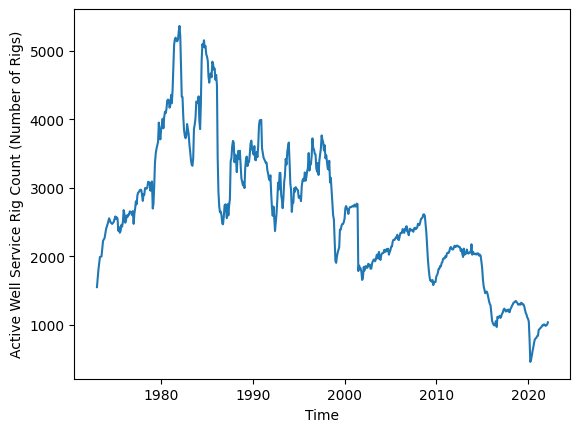

In [20]:
plt.plot(drilling['time'], drilling['Active Well Service Rig Count (Number of Rigs)'])
plt.xlabel('Time')
plt.ylabel('Active Well Service Rig Count (Number of Rigs)')
plt.show()
#Describe what I see: I see that the active well service rig count has had some erratic peaks and falls across the time period, but since hitting its peak at above 5000 rigs in the early 1980s, the count has been declining hitting a record low at below 1000 in 2020

4. Instead of levels, we want to look at change over time. Compute the first difference of Active Well Service Rig Count (Number of Rigs) and plot it over time. Describe what you see.

Text(0, 0.5, 'First Difference of Active Well Service Rig Count (Number of Rigs)')

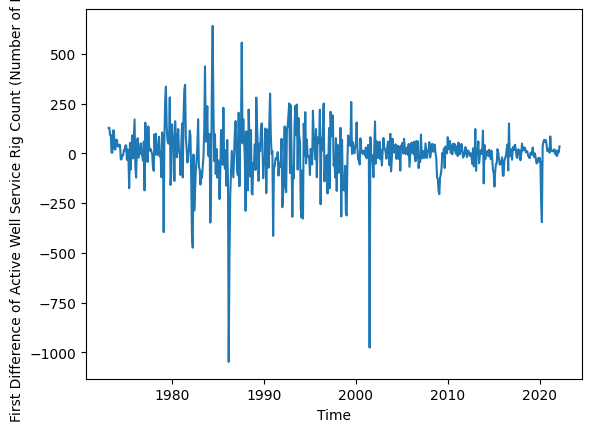

In [21]:
AWSRC_diff = drilling['Active Well Service Rig Count (Number of Rigs)'].diff()
plt.plot(drilling['time'], AWSRC_diff)
plt.xlabel('Time')
plt.ylabel('First Difference of Active Well Service Rig Count (Number of Rigs)')

#I see that there are drastics highs and lows reached for the count of rigs evident by the sharp peaks above and below zero but the variance in change of count of rigs overtime has been diminishing since the early 2000s

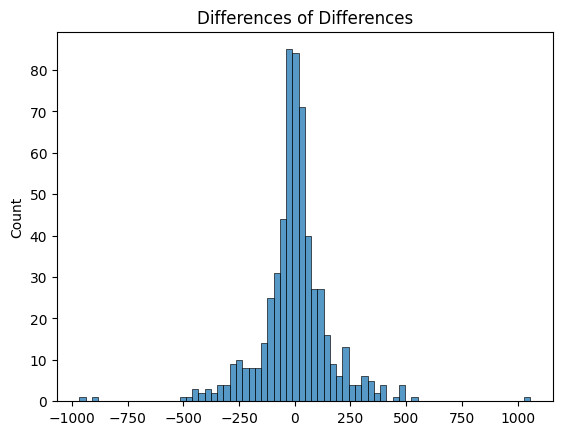

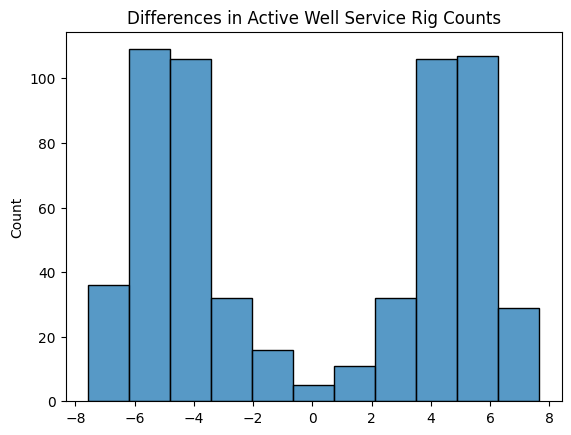

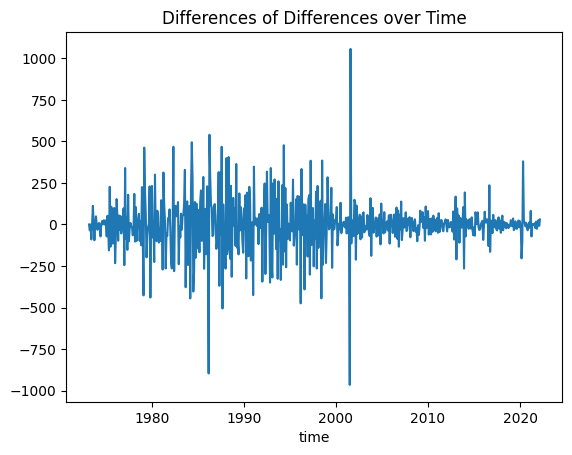

In [27]:
# AWSRC = AWSRC_diff.sort_values('Month') # This line is not needed and causes an error
y = AWSRC_diff.dropna().to_numpy() # Remove NaN values and convert to numpy array
t = len(y)

diff = y[1:] - y[:(t-1)] # First difference of the differenced series

fig = sns.histplot(diff)
fig.set(title='Differences of Differences')
plt.show()

fig = sns.histplot(np.arcsinh(diff))
fig.set(title='Differences in Active Well Service Rig Counts')
plt.show()

fig = sns.lineplot(x=drilling['time'].iloc[2: len(diff) + 2], y=diff) # Used integer locating to splice off the time based but ensure the time column and the differenced data are aligned and have the same length to create the graph
fig.set(title='Differences of Differences over Time')
plt.show()

#There were more volatile and significant differences in the early 2000s and earlier, but since then the difference in active well service rig counts is not as drastic
#Source: https://seaborn.pydata.org/generated/seaborn.lineplot.html

5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [33]:
meltedrigs= pd.melt(drilling, id_vars=['time'], value_vars=['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'], var_name='Rig Type', value_name='Number of Rigs')
meltedrigs.head()

,time,Rig Type,Number of Rigs
0,1973-01-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,1120
1,1973-02-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,1037
2,1973-03-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,959
3,1973-04-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,914
4,1973-05-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,974


[Text(0.5, 1.0, 'Onshore and Offshore Rig Counts Over Time'),
 Text(0.5, 0, 'Time'),
 Text(0, 0.5, 'Number of Rigs')]

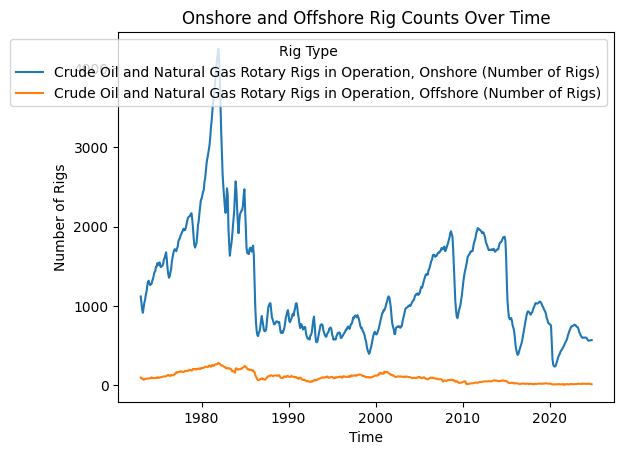

In [34]:
fig = sns.lineplot(data=meltedrigs, x='time', y='Number of Rigs', hue='Rig Type')
fig.set(title='Onshore and Offshore Rig Counts Over Time', xlabel='Time', ylabel='Number of Rigs')